# Student Sentiment Analysis

## importing Package

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

## Analysing Dataset

In [2]:
df = pd.read_csv("./finalDataset.csv")

In [3]:
df.head()

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good
2,1,Excellent lectures are delivered by teachers a...,1.0,All courses material provide very good knowled...,1.0,Exam pattern is up to the mark and the Cgpa de...,1,Lab work is properly covered in the labs by th...,1.0,Library facilities are excellent in terms of g...,1,Extra curricular activities also help students...
3,1,Good,-1.0,Content of course is perfectly in line with th...,-1.0,Again the university tests students of their a...,1,Good,0.0,Its the best thing i have seen in this univers...,-1,Complete wastage of time. Again this opinion i...
4,1,teachers give us all the information required ...,1.0,content of courses improves my knowledge,1.0,examination pattern is good,1,practical work provides detail knowledge of th...,1.0,library has huge collection of books from diff...,1,extracurricular activities increases mental an...


In [4]:
df.columns

Index(['teaching', 'teaching.1', 'coursecontent', 'coursecontent.1',
       'examination', 'Examination', 'labwork', 'labwork.1',
       'library_facilities', ' library_facilities', 'extracurricular',
       'extracurricular.1'],
      dtype='object')

In [5]:
df.shape

(783, 12)

In [6]:
df.loc[[0]]

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...


In [7]:
df.isnull().sum()

teaching               0
teaching.1             0
coursecontent          1
coursecontent.1        0
examination            1
Examination            0
labwork                0
labwork.1              0
library_facilities     3
 library_facilities    0
extracurricular        0
extracurricular.1      0
dtype: int64

In [8]:
pd.unique(df['teaching'])

array([ 0,  1, -1,  4,  5,  6,  7], dtype=int64)

In [9]:
df.dtypes

teaching                 int64
teaching.1              object
coursecontent          float64
coursecontent.1         object
examination            float64
Examination             object
labwork                  int64
labwork.1               object
library_facilities     float64
 library_facilities     object
extracurricular          int64
extracurricular.1       object
dtype: object

## Pre_Processing 

In [35]:
omit_words = ['he','she', "they","is",'was','it','their','than',"will",'theirs','i','this','the','in','for','to','are','also','give','us']
def pre_processing(df):
    for rating, reviews in df.iterrows():
        print(rating)
        print(reviews)
        string = ' '
        
        data = re.sub('[^a-zA-Z0-9\n]',' ',reviews[1])
        data = re.sub('\s+',' ', data)
        data = data.lower()
        
        for word in data.split():
            if word not in omit_words:
                string = string + word +" "
        
        df[df.columns[1]] [rating] = string 
    print("Data preprocessed completed...")

## Teaching

In [36]:
Teaching = df[["teaching","teaching.1"]]

In [37]:
Teaching.head()

,teaching,teaching.1
0,0,teacher are punctual but they should also give...
1,1,Good
2,1,Excellent lectures are delivered by teachers a...
3,1,Good
4,1,teachers give us all the information required ...


In [38]:
count_value_teaching = Teaching['teaching'].value_counts()

<AxesSubplot:>

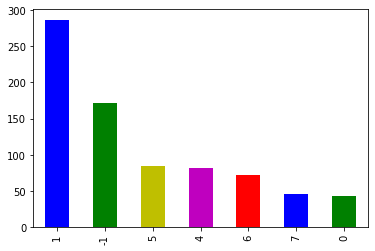

In [39]:
count_value_teaching.plot(kind = 'bar',color = ['b','g','y','m','r'] )

In [40]:
Teaching.dropna(inplace = True)

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
Teaching.isnull().sum()

teaching      0
teaching.1    0
dtype: int64

### Applying preprocessing

In [42]:
pre_processing(Teaching)

0
teaching                                                      0
teaching.1    teacher are punctual but they should also give...
Name: 0, dtype: object
1
teaching          1
teaching.1    Good 
Name: 1, dtype: object
2
teaching                                                      1
teaching.1    Excellent lectures are delivered by teachers a...
Name: 2, dtype: object
3
teaching         1
teaching.1    Good
Name: 3, dtype: object
4
teaching                                                      1
teaching.1    teachers give us all the information required ...
Name: 4, dtype: object
5
teaching        1
teaching.1    Yes
Name: 5, dtype: object
6
teaching                      1
teaching.1    good and punctual
Name: 6, dtype: object
7
teaching               1
teaching.1    It is good
Name: 7, dtype: object
8
teaching         1
teaching.1    Good
Name: 8, dtype: object
9
teaching         1
teaching.1    Good
Name: 9, dtype: object
10
teaching                                                   

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



61
teaching            0
teaching.1    average
Name: 61, dtype: object
62
teaching                                                      1
teaching.1    very good teaching facilities, lecture given a...
Name: 62, dtype: object
63
teaching                                                      0
teaching.1    interaction is good but not with mostly male l...
Name: 63, dtype: object
64
teaching                        1
teaching.1    all things are good
Name: 64, dtype: object
65
teaching                        1
teaching.1    all things are good
Name: 65, dtype: object
66
teaching                           1
teaching.1    all activties are good
Name: 66, dtype: object
67
teaching                           1
teaching.1    all activties are good
Name: 67, dtype: object
68
teaching         1
teaching.1    good
Name: 68, dtype: object
69
teaching                                                      1
teaching.1    All is good. no other university is so serious...
Name: 69, dtype: object
70
tea

146
teaching                                                 0
teaching.1    some lectures are excellent,but not everyone
Name: 146, dtype: object
147
teaching                                                1
teaching.1    It is very good learning in this university
Name: 147, dtype: object
148
teaching                 0
teaching.1    its  booring
Name: 148, dtype: object
149
teaching         1
teaching.1    good
Name: 149, dtype: object
150
teaching         1
teaching.1    Good
Name: 150, dtype: object
151
teaching                                                      0
teaching.1    teaching is good but some lecturers are showin...
Name: 151, dtype: object
152
teaching              1
teaching.1    excellent
Name: 152, dtype: object
153
teaching                                                      0
teaching.1    teaching is good but some teachers are not abl...
Name: 153, dtype: object
154
teaching         1
teaching.1    good
Name: 154, dtype: object
155
teaching                     

224
teaching                   0
teaching.1    nothing to say
Name: 224, dtype: object
225
teaching                         1
teaching.1    staffs are brillient
Name: 225, dtype: object
226
teaching                             0
teaching.1    faculties need to impove
Name: 226, dtype: object
227
teaching            -1
teaching.1    very bad
Name: 227, dtype: object
228
teaching       -1
teaching.1    bad
Name: 228, dtype: object
229
teaching       -1
teaching.1    bad
Name: 229, dtype: object
230
teaching       -1
teaching.1    bad
Name: 230, dtype: object
231
teaching             -1
teaching.1    not worth
Name: 231, dtype: object
232
teaching            -1
teaching.1    not good
Name: 232, dtype: object
233
teaching            -1
teaching.1    not good
Name: 233, dtype: object
234
teaching       -1
teaching.1    not
Name: 234, dtype: object
235
teaching       -1
teaching.1    not
Name: 235, dtype: object
236
teaching       -1
teaching.1    not
Name: 236, dtype: object
237
teaching   

405
teaching              1
teaching.1    delighted
Name: 405, dtype: object
406
teaching              1
teaching.1    ecstatic.
Name: 406, dtype: object
407
teaching          1
teaching.1    glad.
Name: 407, dtype: object
408
teaching           1
teaching.1    joyful
Name: 408, dtype: object
409
teaching           1
teaching.1    joyous
Name: 409, dtype: object
410
teaching             1
teaching.1    cheerful
Name: 410, dtype: object
411
teaching                                                      1
teaching.1    course content where very cheerful and motivat...
Name: 411, dtype: object
412
teaching                   1
teaching.1    very cheerful 
Name: 412, dtype: object
413
teaching                   1
teaching.1    very cheerful 
Name: 413, dtype: object
414
teaching              1
teaching.1    cheerful 
Name: 414, dtype: object
415
teaching                   1
teaching.1    very cheerful 
Name: 415, dtype: object
416
teaching              1
teaching.1    cheerful 
Name: 416, dt

Name: 598, dtype: object
599
teaching               -1
teaching.1    melancholy,
Name: 599, dtype: object
600
teaching             -1
teaching.1    mournful,
Name: 600, dtype: object
601
teaching               -1
teaching.1    depressing,
Name: 601, dtype: object
602
teaching           -1
teaching.1    dismal,
Name: 602, dtype: object
603
teaching          -1
teaching.1    drear,
Name: 603, dtype: object
604
teaching           -1
teaching.1    dreary,
Name: 604, dtype: object
605
teaching                  -1
teaching.1    heartbreaking,
Name: 605, dtype: object
606
teaching                 -1
teaching.1    heartrending,
Name: 606, dtype: object
607
teaching               -1
teaching.1    melancholy,
Name: 607, dtype: object
608
teaching             -1
teaching.1    mournful,
Name: 608, dtype: object
609
teaching           4
teaching.1    angry.
Name: 609, dtype: object
610
teaching             4
teaching.1    enraged.
Name: 610, dtype: object
611
teaching            4
teaching.1    fum

teaching          1
teaching.1    glad.
Name: 710, dtype: object
711
teaching           1
teaching.1    joyful
Name: 711, dtype: object
712
teaching           1
teaching.1    joyous
Name: 712, dtype: object
713
teaching             1
teaching.1    cheerful
Name: 713, dtype: object
714
teaching                   1
teaching.1    very cheerful 
Name: 714, dtype: object
715
teaching              1
teaching.1    delighted
Name: 715, dtype: object
716
teaching                                            1
teaching.1    ecstatic of the course content is nice.
Name: 716, dtype: object
717
teaching                              1
teaching.1    I am very glad to study. 
Name: 717, dtype: object
718
teaching                                            1
teaching.1    classroom environment where very joyful
Name: 718, dtype: object
719
teaching           1
teaching.1    joyous
Name: 719, dtype: object
720
teaching             1
teaching.1    cheerful
Name: 720, dtype: object
721
teaching             

In [43]:
Teaching["teaching.1"][0]

' teacher punctual but should some practical knowledge other theortical '

# Course

In [44]:
course = df[["coursecontent","coursecontent.1"]]

In [45]:
course.head()

,coursecontent,coursecontent.1
0,0.0,content of courses are average
1,-1.0,Not good
2,1.0,All courses material provide very good knowled...
3,-1.0,Content of course is perfectly in line with th...
4,1.0,content of courses improves my knowledge


In [46]:
len(course['coursecontent.1'][0])

30

In [47]:
count_value_course = course['coursecontent'].value_counts()

<AxesSubplot:>

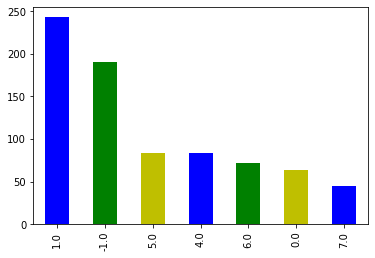

In [48]:
count_value_course.plot(kind = 'bar',color = ['b','g','y'] )

In [49]:
course.isnull().sum()

coursecontent      1
coursecontent.1    0
dtype: int64

In [50]:
course.dropna(inplace= True)

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
course.isnull().sum()

coursecontent      0
coursecontent.1    0
dtype: int64

### Applying preprocessing

In [52]:
pre_processing(course)

0
coursecontent                                 0.0
coursecontent.1    content of courses are average
Name: 0, dtype: object
1
coursecontent          -1.0
coursecontent.1    Not good
Name: 1, dtype: object
2
coursecontent                                                    1.0
coursecontent.1    All courses material provide very good knowled...
Name: 2, dtype: object
3
coursecontent                                                   -1.0
coursecontent.1    Content of course is perfectly in line with th...
Name: 3, dtype: object
4
coursecontent                                           1.0
coursecontent.1    content of courses improves my knowledge
Name: 4, dtype: object
5
coursecontent                         1.0
coursecontent.1    content were very nice
Name: 5, dtype: object
6
coursecontent       1.0
coursecontent.1    Good
Name: 6, dtype: object
7
coursecontent                                                    1.0
coursecontent.1    This semester university has provide best teac...
N

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



coursecontent                                                    1.0
coursecontent.1    IP is provided to the students which is very h...
Name: 69, dtype: object
70
coursecontent                                                    0.0
coursecontent.1    depth of course is less on the other hand know...
Name: 70, dtype: object
71
coursecontent       1.0
coursecontent.1    Good
Name: 71, dtype: object
72
coursecontent                                         -1.0
coursecontent.1    content does not provide deep knowledge
Name: 72, dtype: object
73
coursecontent          0.0
coursecontent.1    average
Name: 73, dtype: object
74
coursecontent                                                   -1.0
coursecontent.1    sometime it is irrelevent with the ongoing cou...
Name: 74, dtype: object
75
coursecontent                                                    0.0
coursecontent.1    average(in one term there should be only two m...
Name: 75, dtype: object
76
coursecontent                         

Name: 153, dtype: object
154
coursecontent            1.0
coursecontent.1    excellent
Name: 154, dtype: object
156
coursecontent       1.0
coursecontent.1    good
Name: 156, dtype: object
157
coursecontent                                                1.0
coursecontent.1    I like communication classes,courses are good
Name: 157, dtype: object
158
coursecontent                                        1.0
coursecontent.1    they are giving good knowledge for us
Name: 158, dtype: object
159
coursecontent            1.0
coursecontent.1    Excellent
Name: 159, dtype: object
160
coursecontent                                                    1.0
coursecontent.1    Knowledgeable is Good, Depth of course is sati...
Name: 160, dtype: object
161
coursecontent           1.0
coursecontent.1    its good
Name: 161, dtype: object
162
coursecontent                                                    1.0
coursecontent.1    every thing is good subjects have a very good ...
Name: 162, dtype: object
163

Name: 254, dtype: object
255
coursecontent                 1.0
coursecontent.1    very cheerful 
Name: 255, dtype: object
256
coursecontent            1.0
coursecontent.1    delighted
Name: 256, dtype: object
257
coursecontent                                          1.0
coursecontent.1    ecstatic of the course content is nice.
Name: 257, dtype: object
258
coursecontent        1.0
coursecontent.1    glad.
Name: 258, dtype: object
259
coursecontent         1.0
coursecontent.1    joyful
Name: 259, dtype: object
260
coursecontent         1.0
coursecontent.1    joyous
Name: 260, dtype: object
261
coursecontent           1.0
coursecontent.1    cheerful
Name: 261, dtype: object
262
coursecontent             -1.0
coursecontent.1    depressing,
Name: 262, dtype: object
263
coursecontent         -1.0
coursecontent.1    dismal,
Name: 263, dtype: object
264
coursecontent        -1.0
coursecontent.1    drear,
Name: 264, dtype: object
265
coursecontent         -1.0
coursecontent.1    dreary,
Name:

413
coursecontent         -1.0
coursecontent.1    dismal,
Name: 413, dtype: object
414
coursecontent        -1.0
coursecontent.1    drear,
Name: 414, dtype: object
415
coursecontent         -1.0
coursecontent.1    dreary,
Name: 415, dtype: object
416
coursecontent                -1.0
coursecontent.1    heartbreaking,
Name: 416, dtype: object
417
coursecontent               -1.0
coursecontent.1    heartrending,
Name: 417, dtype: object
418
coursecontent             -1.0
coursecontent.1    melancholy,
Name: 418, dtype: object
419
coursecontent           -1.0
coursecontent.1    mournful,
Name: 419, dtype: object
420
coursecontent         4.0
coursecontent.1    angry.
Name: 420, dtype: object
421
coursecontent           4.0
coursecontent.1    enraged.
Name: 421, dtype: object
422
coursecontent          4.0
coursecontent.1    fuming.
Name: 422, dtype: object
423
coursecontent           4.0
coursecontent.1    furious.
Name: 423, dtype: object
424
coursecontent            4.0
coursecontent.1 

Name: 574, dtype: object
575
coursecontent         -1.0
coursecontent.1    dismal,
Name: 575, dtype: object
576
coursecontent        -1.0
coursecontent.1    drear,
Name: 576, dtype: object
577
coursecontent         -1.0
coursecontent.1    dreary,
Name: 577, dtype: object
578
coursecontent                -1.0
coursecontent.1    heartbreaking,
Name: 578, dtype: object
579
coursecontent               -1.0
coursecontent.1    heartrending,
Name: 579, dtype: object
580
coursecontent             -1.0
coursecontent.1    melancholy,
Name: 580, dtype: object
581
coursecontent           -1.0
coursecontent.1    mournful,
Name: 581, dtype: object
582
coursecontent         4.0
coursecontent.1    angry.
Name: 582, dtype: object
583
coursecontent           4.0
coursecontent.1    enraged.
Name: 583, dtype: object
584
coursecontent          4.0
coursecontent.1    fuming.
Name: 584, dtype: object
585
coursecontent           4.0
coursecontent.1    furious.
Name: 585, dtype: object
586
coursecontent       

Name: 737, dtype: object
738
coursecontent            4.0
coursecontent.1    very HARD
Name: 738, dtype: object
739
coursecontent            4.0
coursecontent.1    very HARD
Name: 739, dtype: object
740
coursecontent     -1.0
coursecontent.1     no
Name: 740, dtype: object
741
coursecontent     -1.0
coursecontent.1    not
Name: 741, dtype: object
742
coursecontent      -1.0
coursecontent.1    none
Name: 742, dtype: object
743
coursecontent                                 -1.0
coursecontent.1    no one doing their job properly
Name: 743, dtype: object
744
coursecontent                -1.0
coursecontent.1    no one is good
Name: 744, dtype: object
745
coursecontent     -1.0
coursecontent.1    bad
Name: 745, dtype: object
746
coursecontent          -1.0
coursecontent.1    very bad
Name: 746, dtype: object
747
coursecontent       -1.0
coursecontent.1    worst
Name: 747, dtype: object
748
coursecontent          -1.0
coursecontent.1    not good
Name: 748, dtype: object
749
coursecontent     

In [53]:
len(course['coursecontent.1'][0])

28

# Examination

In [54]:
df.head(2)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good


In [55]:
Exam = df[["examination","Examination"]]

In [56]:
Exam.head(2)

,examination,Examination
0,1.0,examination pattern is good
1,1.0,Good


In [57]:
count_value_examination = Exam['examination'].value_counts()

<AxesSubplot:>

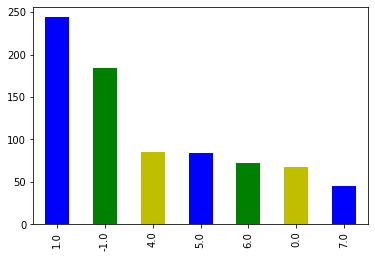

In [58]:
count_value_examination.plot(kind = "bar", color = ['b','g','y'])

In [59]:
Exam.dropna(inplace= True)
Exam.isnull().sum()

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


examination    0
Examination    0
dtype: int64

### Applying preprocessing 

In [60]:
pre_processing(Exam)

0
examination                            1.0
Examination    examination pattern is good
Name: 0, dtype: object
1
examination     1.0
Examination    Good
Name: 1, dtype: object
2
examination                                                  1.0
Examination    Exam pattern is up to the mark and the Cgpa de...
Name: 2, dtype: object
3
examination                                                 -1.0
Examination    Again the university tests students of their a...
Name: 3, dtype: object
4
examination                            1.0
Examination    examination pattern is good
Name: 4, dtype: object
5
examination     1.0
Examination    good
Name: 5, dtype: object
6
examination     1.0
Examination    Good
Name: 6, dtype: object
7
examination                            1.0
Examination    I like the question pattern
Name: 7, dtype: object
8
examination     1.0
Examination    Good
Name: 8, dtype: object
9
examination     1.0
Examination    Good
Name: 9, dtype: object
10
examination                  

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



examination                                                  0.0
Examination    marks distribution is good but paper checking ...
Name: 83, dtype: object
84
examination          1.0
Examination    satisfied
Name: 84, dtype: object
85
examination          1.0
Examination    Excellent
Name: 85, dtype: object
86
examination     1.0
Examination    Good
Name: 86, dtype: object
87
examination     1.0
Examination    good
Name: 87, dtype: object
88
examination          -1.0
Examination    Very Tough
Name: 88, dtype: object
89
examination     1.0
Examination    good
Name: 89, dtype: object
90
examination          1.0
Examination    Excellent
Name: 90, dtype: object
91
examination     1.0
Examination    Good
Name: 91, dtype: object
92
examination      1.0
Examination    good.
Name: 92, dtype: object
93
examination           1.0
Examination    it is good
Name: 93, dtype: object
94
examination   -1.0
Examination    bad
Name: 94, dtype: object
95
examination                                        

174
examination            -1.0
Examination     Not so good
Name: 174, dtype: object
175
examination                        -1.0
Examination    strict paper correction.
Name: 175, dtype: object
176
examination                                     0.0
Examination    super but paper checking is not good
Name: 176, dtype: object
177
examination              1.0
Examination    NICE TIMING..
Name: 177, dtype: object
178
examination                                                  0.0
Examination    That's good to have a negative marking pattern...
Name: 178, dtype: object
179
examination                                                  1.0
Examination    EXAMPATTERN IS GOOD AND MARKS DISTRIBUTION IS ...
Name: 179, dtype: object
181
examination              1.0
Examination    all are good 
Name: 181, dtype: object
182
examination                                                  0.0
Examination    The examination pattern is good .But time is n...
Name: 182, dtype: object
183
examination       

360
examination              6.0
Examination    warm fuzzies.
Name: 360, dtype: object
361
examination           7.0
Examination    amazement,
Name: 361, dtype: object
362
examination              7.0
Examination    astonishment,
Name: 362, dtype: object
363
examination       7.0
Examination    shock,
Name: 363, dtype: object
364
examination             7.0
Examination    startlement,
Name: 364, dtype: object
365
examination              7.0
Examination    stupefaction.
Name: 365, dtype: object
366
examination           7.0
Examination    amazement,
Name: 366, dtype: object
367
examination              7.0
Examination    astonishment,
Name: 367, dtype: object
368
examination       7.0
Examination    shock,
Name: 368, dtype: object
369
examination             7.0
Examination    startlement,
Name: 369, dtype: object
370
examination              7.0
Examination    stupefaction.
Name: 370, dtype: object
371
examination           7.0
Examination    amazement,
Name: 371, dtype: object
372
ex

520
examination      1.0
Examination    glad.
Name: 520, dtype: object
521
examination       1.0
Examination    joyful
Name: 521, dtype: object
522
examination       1.0
Examination    joyous
Name: 522, dtype: object
523
examination         1.0
Examination    cheerful
Name: 523, dtype: object
524
examination               1.0
Examination    very cheerful 
Name: 524, dtype: object
525
examination          1.0
Examination    delighted
Name: 525, dtype: object
526
examination                                        1.0
Examination    ecstatic of the course content is nice.
Name: 526, dtype: object
527
examination                          1.0
Examination    I am very glad to study. 
Name: 527, dtype: object
528
examination                                        1.0
Examination    classroom environment where very joyful
Name: 528, dtype: object
529
examination       1.0
Examination    joyous
Name: 529, dtype: object
530
examination         1.0
Examination    cheerful
Name: 530, dtype: object

Name: 697, dtype: object
698
examination       1.0
Examination    joyous
Name: 698, dtype: object
699
examination         1.0
Examination    cheerful
Name: 699, dtype: object
700
examination          4.0
Examination    very tuff
Name: 700, dtype: object
701
examination     4.0
Examination    tuff
Name: 701, dtype: object
702
examination          4.0
Examination    tuff exam
Name: 702, dtype: object
703
examination          4.0
Examination    tuff exam
Name: 703, dtype: object
704
examination     0.0
Examination    but 
Name: 704, dtype: object
705
examination    0.0
Examination    but
Name: 705, dtype: object
706
examination    0.0
Examination    but
Name: 706, dtype: object
707
examination    0.0
Examination    but
Name: 707, dtype: object
708
examination    0.0
Examination    but
Name: 708, dtype: object
709
examination    0.0
Examination    but
Name: 709, dtype: object
710
examination    0.0
Examination    but
Name: 710, dtype: object
711
examination    0.0
Examination    but
Name: 

In [61]:
Exam.head(2)

,examination,Examination
0,1.0,examination pattern good
1,1.0,good


## Labwork

In [62]:
df.head(2)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good


In [63]:
Lab = df[['labwork','labwork.1']]

In [64]:
Lab.head(2)

,labwork,labwork.1
0,-1,"not satisfactory, lab work must include latest..."
1,1,Good


In [65]:
count_value_lab = Lab['labwork'].value_counts()

<AxesSubplot:>

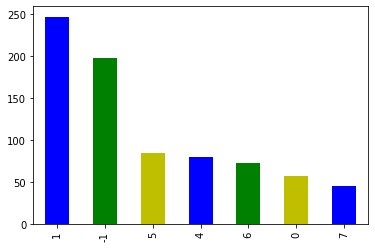

In [66]:
count_value_lab.plot(kind = 'bar', color = ['b','g','y'])

In [67]:
Lab.dropna(inplace= True)
Lab.isnull().sum()

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


labwork      0
labwork.1    0
dtype: int64

In [68]:
pre_processing(Lab)

0
labwork                                                     -1
labwork.1    not satisfactory, lab work must include latest...
Name: 0, dtype: object
1
labwork          1
labwork.1    Good 
Name: 1, dtype: object
2
labwork                                                      1
labwork.1    Lab work is properly covered in the labs by th...
Name: 2, dtype: object
3
labwork         1
labwork.1    Good
Name: 3, dtype: object
4
labwork                                                      1
labwork.1    practical work provides detail knowledge of th...
Name: 4, dtype: object
5
labwork         1
labwork.1    good
Name: 5, dtype: object
6
labwork         1
labwork.1    Good
Name: 6, dtype: object
7
labwork                                                      1
labwork.1    Everything is going fine in lab . learning new...
Name: 7, dtype: object
8
labwork         1
labwork.1    Good
Name: 8, dtype: object
9
labwork         1
labwork.1    Good
Name: 9, dtype: object
10
labwork                  

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



labwork          1
labwork.1    super
Name: 68, dtype: object
69
labwork                                                      1
labwork.1    This is the best in our university because the...
Name: 69, dtype: object
70
labwork                                                     -1
labwork.1    some time lab is not proper working , some tea...
Name: 70, dtype: object
71
labwork         1
labwork.1    Good
Name: 71, dtype: object
72
labwork                 1
labwork.1    satisfactory
Name: 72, dtype: object
73
labwork                                     -1
labwork.1    very poor.no equipments are there
Name: 73, dtype: object
74
labwork        -1
labwork.1    poor
Name: 74, dtype: object
75
labwork                                     -1
labwork.1    very poor.no equipments are there
Name: 75, dtype: object
76
labwork                                                     -1
labwork.1    lab practicals and evaluations are below avera...
Name: 76, dtype: object
77
labwork                     

Name: 233, dtype: object
234
labwork       -1
labwork.1    not
Name: 234, dtype: object
235
labwork       -1
labwork.1    not
Name: 235, dtype: object
236
labwork       -1
labwork.1    not
Name: 236, dtype: object
237
labwork       -1
labwork.1    not
Name: 237, dtype: object
238
labwork            -1
labwork.1    not nice
Name: 238, dtype: object
239
labwork         -1
labwork.1    worst
Name: 239, dtype: object
240
labwork                   1
labwork.1    very cheerful 
Name: 240, dtype: object
241
labwork              1
labwork.1    delighted
Name: 241, dtype: object
242
labwork              1
labwork.1    ecstatic.
Name: 242, dtype: object
243
labwork          1
labwork.1    glad.
Name: 243, dtype: object
244
labwork           1
labwork.1    joyful
Name: 244, dtype: object
245
labwork           1
labwork.1    joyous
Name: 245, dtype: object
246
labwork             1
labwork.1    cheerful
Name: 246, dtype: object
247
labwork                   1
labwork.1    very cheerful 
Name: 247,

Name: 430, dtype: object
431
labwork              4
labwork.1    incensed.
Name: 431, dtype: object
432
labwork               4
labwork.1    indignant.
Name: 432, dtype: object
433
labwork                4
labwork.1    infuriated.
Name: 433, dtype: object
434
labwork         4
labwork.1    mad.
Name: 434, dtype: object
435
labwork           4
labwork.1    angry.
Name: 435, dtype: object
436
labwork             4
labwork.1    enraged.
Name: 436, dtype: object
437
labwork            4
labwork.1    fuming.
Name: 437, dtype: object
438
labwork             4
labwork.1    furious.
Name: 438, dtype: object
439
labwork              4
labwork.1    incensed.
Name: 439, dtype: object
440
labwork               4
labwork.1    indignant.
Name: 440, dtype: object
441
labwork                4
labwork.1    infuriated.
Name: 441, dtype: object
442
labwork         4
labwork.1    mad.
Name: 442, dtype: object
443
labwork           5
labwork.1    alarm.
Name: 443, dtype: object
444
labwork            5
lab

615
labwork                 5
labwork.1    fearfulness,
Name: 615, dtype: object
616
labwork            5
labwork.1    fright,
Name: 616, dtype: object
617
labwork            5
labwork.1    horror,
Name: 617, dtype: object
618
labwork           5
labwork.1    panic,
Name: 618, dtype: object
619
labwork           5
labwork.1    alarm.
Name: 619, dtype: object
620
labwork            5
labwork.1    anxiety
Name: 620, dtype: object
621
labwork          5
labwork.1    dread
Name: 621, dtype: object
622
labwork                 5
labwork.1    fearfulness,
Name: 622, dtype: object
623
labwork            5
labwork.1    fright,
Name: 623, dtype: object
624
labwork            5
labwork.1    horror,
Name: 624, dtype: object
625
labwork           5
labwork.1    panic,
Name: 625, dtype: object
626
labwork           5
labwork.1    alarm.
Name: 626, dtype: object
627
labwork            5
labwork.1    anxiety
Name: 627, dtype: object
628
labwork          5
labwork.1    dread
Name: 628, dtype: object
62

In [69]:
Lab.head(2)

,labwork,labwork.1
0,-1,not satisfactory lab work must include latest...
1,1,good


## Library_facilities

In [70]:
df.head(2)

,teaching,teaching.1,coursecontent,coursecontent.1,examination,Examination,labwork,labwork.1,library_facilities,library_facilities,extracurricular,extracurricular.1
0,0,teacher are punctual but they should also give...,0.0,content of courses are average,1.0,examination pattern is good,-1,"not satisfactory, lab work must include latest...",0.0,library facilities are good but number of book...,1,extracurricular activities are excellent and p...
1,1,Good,-1.0,Not good,1.0,Good,1,Good,-1.0,Not good,1,Good


In [71]:
df.columns

Index(['teaching', 'teaching.1', 'coursecontent', 'coursecontent.1',
       'examination', 'Examination', 'labwork', 'labwork.1',
       'library_facilities', ' library_facilities', 'extracurricular',
       'extracurricular.1'],
      dtype='object')

In [72]:
library = df[['library_facilities',' library_facilities']]

In [73]:
library

,library_facilities,library_facilities
0,0.0,library facilities are good but number of book...
1,-1.0,Not good
2,1.0,Library facilities are excellent in terms of g...
3,0.0,Its the best thing i have seen in this univers...
4,1.0,library has huge collection of books from diff...
...,...,...
778,-1.0,very bad
779,-1.0,worst
780,-1.0,not good
781,-1.0,not appliing


In [74]:
library.columns

Index(['library_facilities', ' library_facilities'], dtype='object')

In [75]:
library.columns = ["library","library_review"]

In [76]:
library.head()

,library,library_review
0,0.0,library facilities are good but number of book...
1,-1.0,Not good
2,1.0,Library facilities are excellent in terms of g...
3,0.0,Its the best thing i have seen in this univers...
4,1.0,library has huge collection of books from diff...


In [77]:
count_value_library = library['library'].value_counts()

<AxesSubplot:>

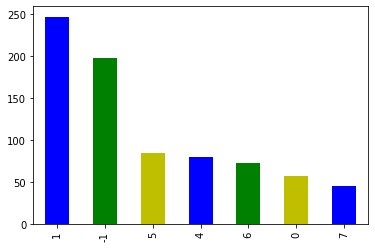

In [78]:
count_value_lab.plot(kind = 'bar', color = ['b','g','y'])

In [79]:
library.dropna(inplace = True)
library.isnull().sum()

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


library           0
library_review    0
dtype: int64

In [80]:
pre_processing(library)

0
library                                                         0.0
library_review    library facilities are good but number of book...
Name: 0, dtype: object
1
library                -1.0
library_review    Not good 
Name: 1, dtype: object
2
library                                                         1.0
library_review    Library facilities are excellent in terms of g...
Name: 2, dtype: object
3
library                                                         0.0
library_review    Its the best thing i have seen in this univers...
Name: 3, dtype: object
4
library                                                         1.0
library_review    library has huge collection of books from diff...
Name: 4, dtype: object
5
library            1.0
library_review    good
Name: 5, dtype: object
6
library                   1.0
library_review    Hardworking
Name: 6, dtype: object
7
library                                                         0.0
library_review    I am satisfied with the facilit

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



library                                                         1.0
library_review    library contains all the books regarding cours...
Name: 76, dtype: object
77
library                                                         1.0
library_review    all the books are easily available and accessa...
Name: 77, dtype: object
78
library                    1.0
library_review    all are good
Name: 78, dtype: object
79
library            1.0
library_review    good
Name: 79, dtype: object
80
library                                                         1.0
library_review    library facilities are good . Every book is av...
Name: 80, dtype: object
81
library            1.0
library_review    good
Name: 81, dtype: object
82
library                                                         1.0
library_review    very good library facilities. Issuing time of ...
Name: 82, dtype: object
83
library                                                        -1.0
library_review    as per libraries, few book

175
library              1.0
library_review    fine  
Name: 175, dtype: object
176
library            1.0
library_review    good
Name: 176, dtype: object
177
library                                                         1.0
library_review    VERY NICE....BUT BOOKS ARE NOT AVAILABE EVERY ...
Name: 177, dtype: object
178
library                      1.0
library_review    They are good.
Name: 178, dtype: object
179
library                       1.0
library_review    IT IS ALSO GOOD
Name: 179, dtype: object
181
library                                                        -1.0
library_review    library facilities are not good.They are not f...
Name: 181, dtype: object
182
library                     1.0
library_review    They are good
Name: 182, dtype: object
183
library                                                   1.0
library_review    We have a good library with all facalities.
Name: 183, dtype: object
184
library                                     0.0
library_review    THERE IS

353
library                  6.0
library_review    beatitude,
Name: 353, dtype: object
354
library               6.0
library_review    blessed
Name: 354, dtype: object
355
library              6.0
library_review    bliss,
Name: 355, dtype: object
356
library                     6.0
library_review    blissfulness,
Name: 356, dtype: object
357
library                 6.0
library_review    felicity,
Name: 357, dtype: object
358
library                 6.0
library_review    gladness,
Name: 358, dtype: object
359
library             6.0
library_review    happy
Name: 359, dtype: object
360
library                     6.0
library_review    warm fuzzies.
Name: 360, dtype: object
361
library                  7.0
library_review    amazement,
Name: 361, dtype: object
362
library                     7.0
library_review    astonishment,
Name: 362, dtype: object
363
library              7.0
library_review    shock,
Name: 363, dtype: object
364
library                    7.0
library_review    startlem

519
library                 1.0
library_review    ecstatic.
Name: 519, dtype: object
520
library             1.0
library_review    glad.
Name: 520, dtype: object
521
library              1.0
library_review    joyful
Name: 521, dtype: object
522
library              1.0
library_review    joyous
Name: 522, dtype: object
523
library                1.0
library_review    cheerful
Name: 523, dtype: object
524
library                      1.0
library_review    very cheerful 
Name: 524, dtype: object
525
library                 1.0
library_review    delighted
Name: 525, dtype: object
526
library                                               1.0
library_review    ecstatic of the course content is nice.
Name: 526, dtype: object
527
library                                 1.0
library_review    I am very glad to study. 
Name: 527, dtype: object
528
library                                               1.0
library_review    classroom environment where very joyful
Name: 528, dtype: object
529
librar

624
library               5.0
library_review    horror,
Name: 624, dtype: object
625
library              5.0
library_review    panic,
Name: 625, dtype: object
626
library              5.0
library_review    alarm.
Name: 626, dtype: object
627
library               5.0
library_review    anxiety
Name: 627, dtype: object
628
library             5.0
library_review    dread
Name: 628, dtype: object
629
library                    5.0
library_review    fearfulness,
Name: 629, dtype: object
630
library               5.0
library_review    fright,
Name: 630, dtype: object
631
library               5.0
library_review    horror,
Name: 631, dtype: object
632
library              5.0
library_review    panic,
Name: 632, dtype: object
633
library                  6.0
library_review    beatitude,
Name: 633, dtype: object
634
library               6.0
library_review    blessed
Name: 634, dtype: object
635
library              6.0
library_review    bliss,
Name: 635, dtype: object
636
library             

733
library            4.0
library_review    HARD
Name: 733, dtype: object
734
library            4.0
library_review    HARD
Name: 734, dtype: object
735
library            4.0
library_review    HARD
Name: 735, dtype: object
736
library                 4.0
library_review    very HARD
Name: 736, dtype: object
737
library                 4.0
library_review    very HARD
Name: 737, dtype: object
738
library                 4.0
library_review    very HARD
Name: 738, dtype: object
739
library                 4.0
library_review    very HARD
Name: 739, dtype: object
740
library          -1.0
library_review     no
Name: 740, dtype: object
741
library          -1.0
library_review    not
Name: 741, dtype: object
742
library           -1.0
library_review    none
Name: 742, dtype: object
743
library                                      -1.0
library_review    no one doing their job properly
Name: 743, dtype: object
744
library                     -1.0
library_review    no one is good
Name: 744, dtyp

In [81]:
library.head(2)

,library,library_review
0,0.0,library facilities good but number of books l...
1,-1.0,not good


### Extracurricular

In [82]:
Extracurricular = df[['extracurricular', 'extracurricular.1']]

In [83]:
Extracurricular.head(2)

,extracurricular,extracurricular.1
0,1,extracurricular activities are excellent and p...
1,1,Good


In [84]:
count_value_extra = Extracurricular['extracurricular'].value_counts()

<AxesSubplot:>

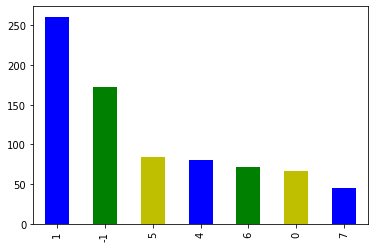

In [85]:
count_value_extra.plot(kind = "bar", color = ['b','g','y'])

In [86]:
Extracurricular.dropna(inplace = True)
Extracurricular.isnull().sum()

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


extracurricular      0
extracurricular.1    0
dtype: int64

In [87]:
pre_processing(Extracurricular)

0
extracurricular                                                      1
extracurricular.1    extracurricular activities are excellent and p...
Name: 0, dtype: object
1
extracurricular          1
extracurricular.1    Good 
Name: 1, dtype: object
2
extracurricular                                                      1
extracurricular.1    Extra curricular activities also help students...
Name: 2, dtype: object
3
extracurricular                                                     -1
extracurricular.1    Complete wastage of time. Again this opinion i...
Name: 3, dtype: object
4
extracurricular                                                      1
extracurricular.1    extracurricular activities increases mental an...
Name: 4, dtype: object
5
extracurricular         1
extracurricular.1    good
Name: 5, dtype: object
6
extracurricular             0
extracurricular.1    No views
Name: 6, dtype: object
7
extracurricular                                                   0
extracurricular.1    

c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\boobathy a\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.



extracurricular            0
extracurricular.1    average
Name: 75, dtype: object
76
extracurricular                                                      1
extracurricular.1    lot of activities and students get exposure in...
Name: 76, dtype: object
77
extracurricular                                                      1
extracurricular.1    too many activities are conducted and student ...
Name: 77, dtype: object
78
extracurricular                             1
extracurricular.1    they are going excellent
Name: 78, dtype: object
79
extracurricular         1
extracurricular.1    good
Name: 79, dtype: object
80
extracurricular         1
extracurricular.1    good
Name: 80, dtype: object
81
extracurricular         1
extracurricular.1    good
Name: 81, dtype: object
82
extracurricular              1
extracurricular.1    excellent
Name: 82, dtype: object
83
extracurricular                        0
extracurricular.1    not much interested
Name: 83, dtype: object
84
extracurricular       

163
extracurricular                                                     -1
extracurricular.1    before coming to lpu i thought sports were ver...
Name: 163, dtype: object
164
extracurricular                                                     -1
extracurricular.1    not every one is getting opportunities here on...
Name: 164, dtype: object
165
extracurricular                                                      1
extracurricular.1    it seems to me very good since it is a good so...
Name: 165, dtype: object
166
extracurricular                      1
extracurricular.1    They are sportive
Name: 166, dtype: object
167
extracurricular                                                      1
extracurricular.1    One of the best things I like about this unive...
Name: 167, dtype: object
168
extracurricular                           1
extracurricular.1    They are extraordinary
Name: 168, dtype: object
169
extracurricular                                                      1
extracurricular.1

325
extracurricular                 5
extracurricular.1    fearfulness,
Name: 325, dtype: object
326
extracurricular            5
extracurricular.1    fright,
Name: 326, dtype: object
327
extracurricular            5
extracurricular.1    horror,
Name: 327, dtype: object
328
extracurricular           5
extracurricular.1    panic,
Name: 328, dtype: object
329
extracurricular           5
extracurricular.1    alarm.
Name: 329, dtype: object
330
extracurricular            5
extracurricular.1    anxiety
Name: 330, dtype: object
331
extracurricular          5
extracurricular.1    dread
Name: 331, dtype: object
332
extracurricular                 5
extracurricular.1    fearfulness,
Name: 332, dtype: object
333
extracurricular            5
extracurricular.1    fright,
Name: 333, dtype: object
334
extracurricular            5
extracurricular.1    horror,
Name: 334, dtype: object
335
extracurricular           5
extracurricular.1    panic,
Name: 335, dtype: object
336
extracurricular              

447
extracurricular            5
extracurricular.1    horror,
Name: 447, dtype: object
448
extracurricular           5
extracurricular.1    panic,
Name: 448, dtype: object
449
extracurricular           5
extracurricular.1    alarm.
Name: 449, dtype: object
450
extracurricular            5
extracurricular.1    anxiety
Name: 450, dtype: object
451
extracurricular          5
extracurricular.1    dread
Name: 451, dtype: object
452
extracurricular                 5
extracurricular.1    fearfulness,
Name: 452, dtype: object
453
extracurricular            5
extracurricular.1    fright,
Name: 453, dtype: object
454
extracurricular            5
extracurricular.1    horror,
Name: 454, dtype: object
455
extracurricular           5
extracurricular.1    panic,
Name: 455, dtype: object
456
extracurricular           5
extracurricular.1    alarm.
Name: 456, dtype: object
457
extracurricular            5
extracurricular.1    anxiety
Name: 457, dtype: object
458
extracurricular          5
extracurricula

623
extracurricular            5
extracurricular.1    horror,
Name: 623, dtype: object
624
extracurricular           5
extracurricular.1    panic,
Name: 624, dtype: object
625
extracurricular           5
extracurricular.1    alarm.
Name: 625, dtype: object
626
extracurricular            5
extracurricular.1    anxiety
Name: 626, dtype: object
627
extracurricular          5
extracurricular.1    dread
Name: 627, dtype: object
628
extracurricular                 5
extracurricular.1    fearfulness,
Name: 628, dtype: object
629
extracurricular            5
extracurricular.1    fright,
Name: 629, dtype: object
630
extracurricular            5
extracurricular.1    horror,
Name: 630, dtype: object
631
extracurricular           5
extracurricular.1    panic,
Name: 631, dtype: object
632
extracurricular               6
extracurricular.1    beatitude,
Name: 632, dtype: object
633
extracurricular            6
extracurricular.1    blessed
Name: 633, dtype: object
634
extracurricular           6
extra

715
extracurricular                        0
extracurricular.1    but need to improve
Name: 715, dtype: object
716
extracurricular                        0
extracurricular.1    but need to improve
Name: 716, dtype: object
717
extracurricular                        0
extracurricular.1    but need to improve
Name: 717, dtype: object
718
extracurricular                        0
extracurricular.1    but need to improve
Name: 718, dtype: object
719
extracurricular                        0
extracurricular.1    but need to improve
Name: 719, dtype: object
720
extracurricular                        0
extracurricular.1    but need to improve
Name: 720, dtype: object
721
extracurricular                        0
extracurricular.1    but need to improve
Name: 721, dtype: object
722
extracurricular                        0
extracurricular.1    but need to improve
Name: 722, dtype: object
723
extracurricular                        0
extracurricular.1    but need to improve
Name: 723, dtype: object
7

In [88]:
Extracurricular.head()

,extracurricular,extracurricular.1
0,1,extracurricular activities excellent and prov...
1,1,good
2,1,extra curricular activities help students div...
3,-1,complete wastage of time again opinion strict...
4,1,extracurricular activities increases mental a...


## Data spliting

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
from sklearn.linear_model import LogisticRegression

### Teaching

In [92]:
y_teach = Teaching['teaching']
x_teach = Teaching['teaching.1']

In [94]:
y_train_teach, y_test_teach , X_train_teach ,X_test_teach = train_test_split(y_teach,x_teach , train_size=0.2)

In [95]:
log = LogisticRegression()

In [96]:
from sklearn.pipeline import Pipeline
Vectorizer = CountVectorizer()

In [97]:
model = Pipeline([('vectorizer',Vectorizer),('classification',log)])

In [99]:
model.fit(X_train_teach,y_train_teach)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [100]:
from sklearn.metrics import confusion_matrix


In [101]:
prediction = model.predict(X_test_teach)

In [102]:
prediction

array([ 1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  4,  1,
        1,  1, -1,  1,  1,  0,  1, -1,  5,  1,  6,  1,  4, -1, -1,  0,  1,
        1, -1,  1,  1,  5, -1,  4, -1,  1, -1,  4, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  5,  1,  1,  1,  1,  5, -1,  1,  1,  7,  1,  1,  1,  1,
        1,  1,  5,  4,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  6,  1,
        1,  1,  6,  1,  1, -1,  1,  1,  1,  4,  1,  1,  1,  5,  1,  6,  7,
        1,  1,  1,  1,  1,  1,  1,  5,  1,  4,  1,  1, -1, -1, -1,  1,  1,
       -1, -1,  5,  1,  7, -1, -1, -1, -1,  6,  1, -1,  1,  1,  1,  7,  4,
       -1,  1,  1, -1,  1, -1,  5,  6,  1,  1,  0,  5, -1, -1, -1,  1,  6,
        1, -1,  1, -1, -1,  1,  5,  6,  1,  5,  1, -1,  1,  1,  5,  1, -1,
        4,  1,  1,  5, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  4, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  5,  1,  4,  1, -1,
        5,  1,  1,  1,  1, -1,  5,  1,  1,  1, -1,  6,  0,  7,  1,  1,  6,
        1,  1, -1, -1,  1

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test_teach, prediction)

0.8213716108452951

In [105]:
print(y_test_teach)

570    1
595   -1
603   -1
610    4
764   -1
      ..
350    6
330    5
647    5
285    4
658    5
Name: teaching, Length: 627, dtype: int64


In [108]:
result = model.predict(['joy'])

In [109]:
result

array([1], dtype=int64)

In [110]:
import pickle

In [111]:
with open('teaching.pkl', 'wb') as files:
    pickle.dump(model, files)

### Course

In [112]:
course.head(2)

,coursecontent,coursecontent.1
0,0.0,content of courses average
1,-1.0,not good


In [113]:
y_course = course['coursecontent']
x_course = course['coursecontent.1']

In [114]:
y_train_course, y_test_course , X_train_course ,X_test_course = train_test_split(y_course,x_course , train_size=0.2)

In [115]:
model.fit(X_train_course,y_train_course)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [116]:
prediction = model.predict(X_test_course)

In [117]:
accuracy_score(y_test_course, prediction)

0.7763578274760383

In [118]:
with open('course.pkl', 'wb') as files:
    pickle.dump(model, files)

### Exam

In [143]:
Exam.head(2)

,examination,Examination
0,1.0,examination pattern good
1,1.0,good


In [144]:
Exam.isnull().sum()

examination    0
Examination    0
dtype: int64

In [145]:
y_exam = Exam['examination']
x_exam = Exam['Examination']

In [146]:
y_train_exam, y_test_exam , X_train_exam ,X_test_exam = train_test_split(y_exam,x_exam, train_size=0.2)

In [147]:
model.fit(X_train_exam,y_train_exam)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [160]:
prediction = model.predict(X_test_exam)

In [161]:
accuracy_score(y_test_exam, prediction)

0.7859424920127795

In [162]:
with open('exam.pkl', 'wb') as files:
    pickle.dump(model, files)

### Lab

In [163]:
Lab.head(2)

,labwork,labwork.1
0,-1,not satisfactory lab work must include latest...
1,1,good


In [164]:
y_Lab = Lab['labwork']
x_Lab = Lab['labwork.1']

In [165]:
y_train_Lab, y_test_Lab , X_train_Lab,X_test_Lab= train_test_split(y_Lab,x_Lab, train_size=0.2)

In [166]:
model.fit(X_train_Lab,y_train_Lab)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [167]:
with open('lab.pkl', 'wb') as files:
    pickle.dump(model, files)

### Library 

In [168]:
library.head(2)

,library,library_review
0,0.0,library facilities good but number of books l...
1,-1.0,not good


In [169]:
y_library = library['library']
x_library = library['library_review']

In [170]:
y_train_library, y_test_library , X_train_library ,X_test_library= train_test_split(y_library,x_library, train_size=0.2)

In [171]:
model.fit(X_train_library,y_train_library)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [172]:
prediction = model.predict(X_test_library)

In [173]:
accuracy_score(y_test_library, prediction)

0.8381410256410257

In [174]:
with open('library.pkl', 'wb') as files:
    pickle.dump(model, files)

### Extracurricular

In [175]:
Extracurricular.head(2)

,extracurricular,extracurricular.1
0,1,extracurricular activities excellent and prov...
1,1,good


In [176]:
y_Extra = Extracurricular['extracurricular']
x_Extra = Extracurricular['extracurricular.1']

In [177]:
y_train_Extra, y_test_Extra , X_train_Extra ,X_test_Extra = train_test_split(y_Extra,x_Extra, train_size=0.2)

In [178]:
model.fit(X_train_Extra,y_train_Extra)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classification', LogisticRegression())])

In [179]:
prediction = model.predict(X_test_Extra)

In [180]:
accuracy_score(y_test_Extra, prediction)

0.784688995215311

In [181]:
with open('extra.pkl', 'wb') as files:
    pickle.dump(model, files)

## Applying Decision Tree

### Teaching

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
DT = DecisionTreeClassifier().fit(Xv_train_tech, y_train_teach)
DT_score_teach = DT.score(Xv_train_tech, y_train_teach)

NameError: name 'Xv_train_tech' is not defined

### Course

In [142]:
DT = DecisionTreeClassifier().fit(Xv_train_course, y_train_course)
DT_score_course = DT.score(Xv_train_course, y_train_course)

NameError: name 'Xv_train_course' is not defined

### Exam

In [196]:
DT = DecisionTreeClassifier().fit(Xv_train_exam, y_train_exam)
DT_score_exam = DT.score(Xv_train_exam, y_train_exam)

### Lab

In [197]:
DT = DecisionTreeClassifier().fit(Xv_train_Lab, y_train_Lab)
DT_score_Lab = DT.score(Xv_train_Lab, y_train_Lab)

### Library

In [198]:
DT = DecisionTreeClassifier().fit(Xv_train_library, y_train_library)
DT_score_library = DT.score(Xv_train_library, y_train_library)

### Extracurricular

In [199]:
DT = DecisionTreeClassifier().fit(Xv_train_Extra, y_train_Extra)
DT_score_Extra = DT.score(Xv_train_Extra, y_train_Extra)

## Tabulation

In [202]:
from tabulate import tabulate

In [203]:
table_1 = [['Teaching',DT_score_teach],['Course',DT_score_course],['Exam',DT_score_exam],
                   ['Lab',DT_score_Lab],['Library',DT_score_library],['Extra',DT_score_Extra]]

In [204]:
Decision_result = tabulate(table_1,headers = ['Module','Score'], tablefmt='orgtbl')

In [205]:
print(Decision_result)

| Module   |   Score |
|----------+---------|
| Teaching |       1 |
| Course   |       1 |
| Exam     |       1 |
| Lab      |       1 |
| Library  |       1 |
| Extra    |       1 |


In [206]:
import pickle

In [209]:
with open('model_pkl_1.pkl', 'wb') as files:
    pickle.dump(DT, files)

In [146]:
A = [["I like the way the faculty teach in this colleage"],["not good"]]

In [147]:
c = []

In [148]:
for i in A:
    for j in i:
        data = re.sub('[^a-zA-Z0-9\n]',' ',j)
        data = re.sub('\s+',' ', data)
        data = data.lower()
        string = ' '
        
        for word in data.split():
            if word not in omit_words:
                string = string + word +" "
        
        c.append(string)

In [149]:
c

[' like way faculty teach colleage ', ' not good ']

In [150]:
b = Vectorizer.transform(c)

In [151]:
sc = []
for i in b:
    score = DT.predict(b)
    sc.append(score)

In [152]:
sc

[array([1., 1.]), array([1., 1.])]

In [ ]:
string = [string]

In [161]:
data = re.sub('[^a-zA-Z0-9\n]',' ','worst')
data = re.sub('\s+',' ', data)
data = data.lower()
string = ' '
for word in data.split():
    if word not in omit_words:
        string = string + word +" "
        
print(string)

 worst 


In [162]:
string = [string]

In [163]:
b = Vectorizer.transform(string)

In [164]:
DT.predict(b)

array([1.])